In [1]:
import os, sys
from datetime import date

import xarray as xr
from cloudpathlib import AnyPath
import matplotlib.pyplot as plt

# Local
curdir = os.getcwd()
print(curdir+"../data_processing")
sys.path.insert(0, curdir+"/../data_processing")
sys.path.insert(0, curdir+"/../visualization")
import ceres_ebaf
import ceres_ebaf_plotting

fig_path = AnyPath("../../Figs")
current_month_folder="23Aug"

merra_raw_location = AnyPath("/Users/mawa7160/dev/data/MERRA2/23Aug/Raw")
merra_output_location = AnyPath("/Users/mawa7160/dev/data/MERRA2/23Aug")

/Users/mawa7160/Library/CloudStorage/OneDrive-UCB-O365/Documents/GitHub/Hemispheric-Albedo-Project/Albedo_project/Notebooks../data_processing


Temp Difference 0.016 W/m^2 per Year. With R^2 0.6153003110046771
Temp Difference -0.039 W/m^2 per Year. With R^2 0.46905249549934125
Temp Difference -0.004 W/m^2 per Year. With R^2 0.19931597860506484
Temp Difference 0.0 W/m^2 per Year. With R^2 0.4379168000379095


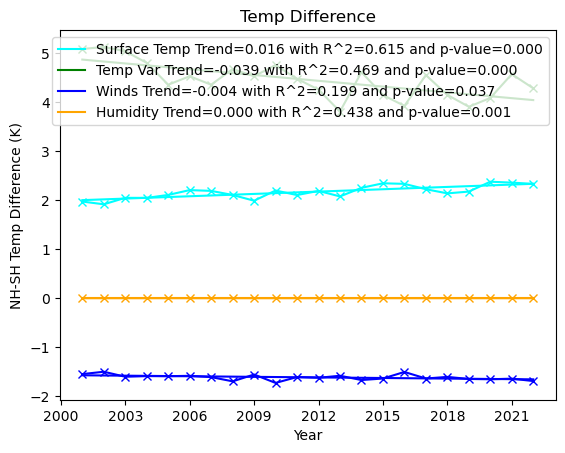

In [2]:
merra_data = xr.open_dataset(merra_output_location / "Merra2_monthly_01_00-06_23.nc")
merra_surface_temp = ceres_ebaf.create_hemisphere_data(merra_data["TLML"], time_weighting=1, end_yr="2023")
merra_surface_temp_var = ceres_ebaf.create_hemisphere_data(merra_data["Var_TLML"], time_weighting=1, end_yr="2023")
merra_surface_pressure = ceres_ebaf.create_hemisphere_data(merra_data["PS"], time_weighting=1, end_yr="2023")
merra_surface_wind_speed = ceres_ebaf.create_hemisphere_data(merra_data["SPEEDLML"], time_weighting=1, end_yr="2023")
merra_surface_humidity = ceres_ebaf.create_hemisphere_data(merra_data["QLML"], time_weighting=1, end_yr="2023")

merra_surface_temp_diff = merra_surface_temp["nh"] - merra_surface_temp["sh"]
merra_surface_temp_var_diff = merra_surface_temp_var["nh"] - merra_surface_temp_var["sh"]
merra_surface_pressure_diff = merra_surface_pressure["nh"] - merra_surface_pressure["sh"]
merra_surface_wind_diff = merra_surface_wind_speed["nh"] - merra_surface_wind_speed["sh"]
merra_surface_humid_diff = merra_surface_humidity["nh"] - merra_surface_humidity["sh"]

ceres_ebaf_plotting.plot_data_with_reg_line(merra_surface_temp_diff.year, merra_surface_temp_diff, include_trends=True,
                                            y_label="NH-SH Temp Difference (K)", tick_color="cyan", label="Surface Temp",
                                            title="Temp Difference")

ceres_ebaf_plotting.plot_data_with_reg_line(merra_surface_temp_var_diff.year, merra_surface_temp_var_diff, include_trends=True,
                                            y_label="NH-SH Temp Difference (K)", tick_color="green", label="Temp Var",
                                            title="Temp Difference")

#ceres_ebaf_plotting.plot_data_with_reg_line(merra_surface_pressure_diff.year, merra_surface_pressure_diff, include_trends=True,
#                                            y_label="NH-SH Temp Difference (K)", tick_color="red", label="Pressure",
#                                            title="Temp Difference")

ceres_ebaf_plotting.plot_data_with_reg_line(merra_surface_wind_diff.year, merra_surface_wind_diff, include_trends=True,
                                            y_label="NH-SH Temp Difference (K)", tick_color="blue", label="Winds",
                                            title="Temp Difference")

ceres_ebaf_plotting.plot_data_with_reg_line(merra_surface_humid_diff.year, merra_surface_humid_diff, include_trends=True,
                                            y_label="NH-SH Temp Difference (K)", tick_color="orange", label="Humidity",
                                            title="Temp Difference")

In [3]:
merra_data = xr.open_dataset(merra_output_location / "Merra2_monthly_01_00-06_23.nc")

merra_surface_temp_v1 = ceres_ebaf.create_hemisphere_data(merra_data["TLML"], time_weighting=1, end_yr="2023")
merra_surface_temp_run = ceres_ebaf.create_hemisphere_data(merra_data["TLML"], time_weighting=0, running_length=12, end_yr="2023")

In [4]:
years_date_time = []
for year in merra_surface_temp.year.values:
    years_date_time.append(date(year, 1, 1))

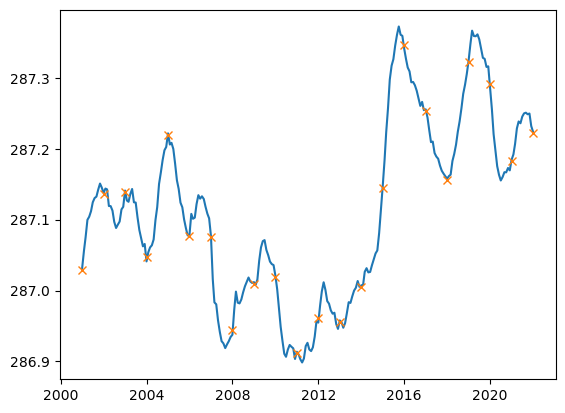

In [5]:
plt.plot(merra_surface_temp_run.time, merra_surface_temp_run["global"])
plt.plot(years_date_time, merra_surface_temp["global"], "x")